# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

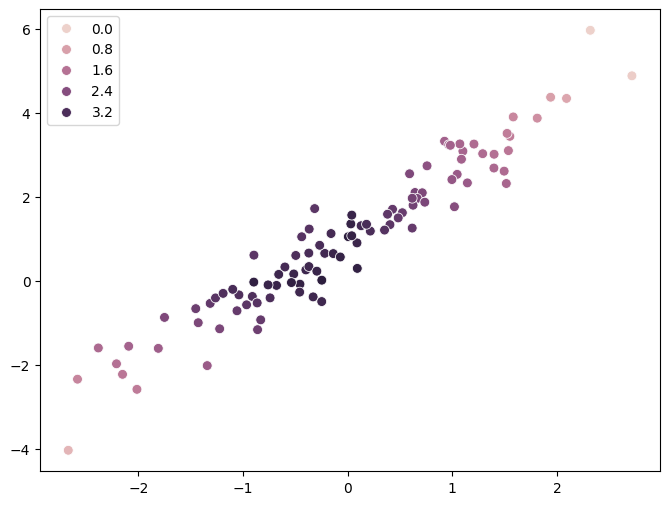

In [39]:
x1 = np.random.normal(size=100)
x2 = x1 * 1.5 + 1 + np.random.normal(size=100, scale=0.5)
X = np.array([x1, x2]).T
y = np.sqrt(np.abs(X.T[0] * X.T[1]))
y = y.max() - y

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.T[0], y=X.T[1], hue=y, s=50)
plt.show()

# Model

Source:
- <a href="https://www.youtube.com/watch?v=rTEtEy5o3X0">AssemblyAI</a>

In [40]:
class KNNRegressor():
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = np.array([self._predict(x) for x in X])
        return predictions

    def _predict(self, x):
        # compute the distances
        distances = [self.euqlidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_values = [self.y_train[i] for i in k_indices]

        # average of closest k
        avg = np.mean(k_nearest_values)
        return avg

    @staticmethod
    def euqlidean_distance(point1, point2):
        distance = np.sqrt(np.sum((point1-point2)**2))
        return distance

# Train

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KNNclasScretch = KNNRegressor(3)
KNNclasScretch.fit(X_train, y_train)

# Evaluate

In [45]:
from sklearn.metrics import mean_squared_error

y_pred = KNNclasScretch.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: {}\nRMSE: {}".format(
    round(mse, 2),
    round(np.sqrt(mse), 2)
))

MSE: 0.07
RMSE: 0.26
